In [7]:
#import all the necessary libaraies
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [15]:
#image masking --> going with the edge detection
import cv2

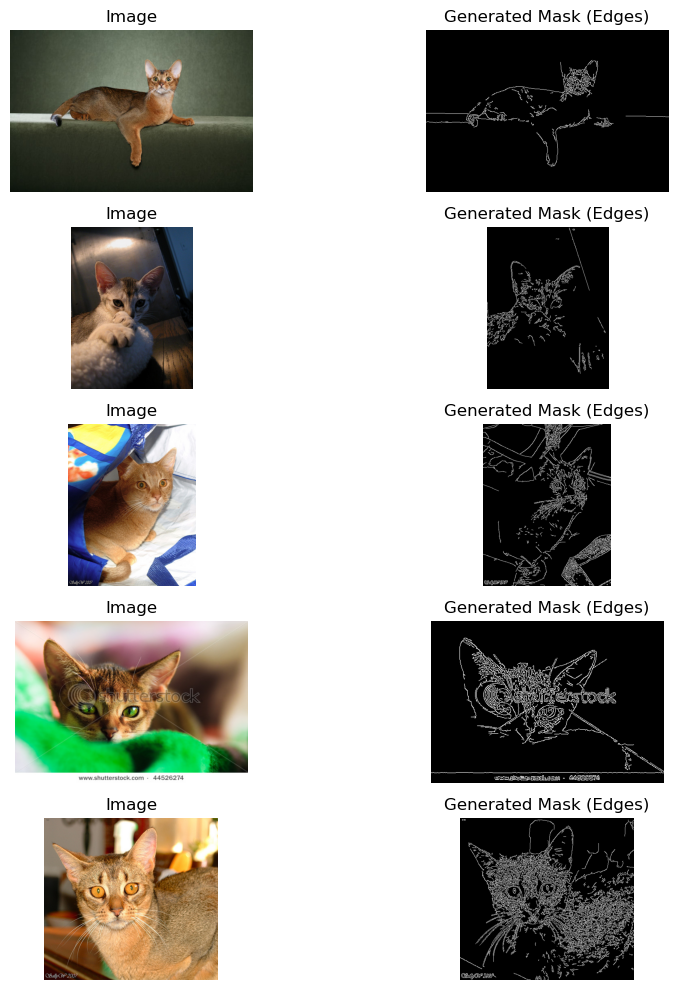

In [17]:
# Set the correct path for images
image_dir = r"C:\Users\lsrin\Downloads\TS-3\DL_CODES\images\images"

# Filter only valid image files
valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff')
image_files = [f for f in sorted(os.listdir(image_dir)) if f.lower().endswith(valid_extensions)]

# Read and display first 5 images with generated masks
num_images = min(5, len(image_files))
fig, axes = plt.subplots(num_images, 2, figsize=(10, 10))

for i in range(num_images):
    file_path = os.path.join(image_dir, image_files[i])
    
    # Load image
    img = load_img(file_path)
    img_array = img_to_array(img) / 255.0  # Normalize image
    
    # Convert to grayscale for edge detection
    gray_img = cv2.cvtColor((img_array * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
    
    # Apply Canny edge detection to create a rough mask
    edges = cv2.Canny(gray_img, threshold1=100, threshold2=200)
    
    # Display
    axes[i, 0].imshow(img_array)
    axes[i, 0].set_title("Image")
    axes[i, 0].axis("off")
    
    axes[i, 1].imshow(edges, cmap="gray")
    axes[i, 1].set_title("Generated Mask (Edges)")
    axes[i, 1].axis("off")

plt.tight_layout()
plt.show()


In [ ]:
# let save the all the edge detected images in mask_images folder

# run the below code again and again

In [19]:
#paths of the directory
image_dir = r"C:\Users\lsrin\Downloads\TS-3\DL_CODES\images\images"
mask_dir = r"C:\Users\lsrin\Downloads\TS-3\DL_CODES\images\mask_images"

# load and preprocess images & masks

In [33]:
# Image settings
IMG_HEIGHT = 128
IMG_WIDTH = 128
NUM_CLASSES = 2  # Background & Object (for binary segmentation)

# Filter only valid image files
valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff')
image_files = [f for f in sorted(os.listdir(image_dir)) if f.lower().endswith(valid_extensions)]
mask_files = [f for f in sorted(os.listdir(mask_dir)) if f.lower().endswith(valid_extensions)]

In [34]:
# Load and preprocess images & masks

In [35]:
def load_data(image_files, mask_files, image_dir, mask_dir):
    images, masks = [], []
    for img_file, mask_file in zip(image_files, mask_files):
        # Load and resize image
        img = load_img(os.path.join(image_dir, img_file), target_size=(IMG_HEIGHT, IMG_WIDTH))
        img = img_to_array(img) / 255.0
        images.append(img)
        
        # Load and resize mask
        mask = load_img(os.path.join(mask_dir, mask_file), target_size=(IMG_HEIGHT, IMG_WIDTH), color_mode='grayscale')
        mask = img_to_array(mask) / 255.0
        mask = np.where(mask > 0.5, 1, 0)  # Convert to binary
        masks.append(mask)
    
    return np.array(images), np.array(masks)

images, masks = load_data(image_files, mask_files, image_dir, mask_dir)



In [38]:
# Convert masks to categorical
from tensorflow.keras.utils import to_categorical
masks = to_categorical(masks, num_classes=NUM_CLASSES)

In [41]:
from sklearn.model_selection import train_test_split
# Split into train, val, test sets
X_train, X_test, y_train, y_test = train_test_split(images, masks, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [43]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [45]:

def build_model():
    inputs = layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))
    
    
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    
    x = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    
    
    outputs = layers.Conv2D(NUM_CLASSES, (1, 1), activation='softmax')(x)
    
    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [49]:
#let call the model
model = build_model()

In [51]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=16
)

Epoch 1/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 111s 333ms/step - accuracy: 0.9038 - loss: 0.3206 - val_accuracy: 0.9000 - val_loss: 0.2503
Epoch 2/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 294s 993ms/step - accuracy: 0.9021 - loss: 0.2462 - val_accuracy: 0.9000 - val_loss: 0.2459
Epoch 3/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 93s 315ms/step - accuracy: 0.9040 - loss: 0.2382 - val_accuracy: 0.9000 - val_loss: 0.2447
Epoch 4/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 171s 578ms/step - accuracy: 0.9031 - loss: 0.2389 - val_accuracy: 0.9000 - val_loss: 0.2430
Epoch 5/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 85s 285ms/step - accuracy: 0.9027 - loss: 0.2390 - val_accuracy: 0.9000 - val_loss: 0.2417
Epoch 6/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 83s 280ms/step - accuracy: 0.8997 - loss: 0.2436 - val_accuracy: 0.9000 - val_loss: 0.2415
Epoch 7/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 91s 307ms/step - accuracy: 0.9015 - loss: 0.2392 - val_accuracy: 0.9000 - val_loss: 0.2416
Epoch 8/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 87s 293ms/step - accuracy: 0.9037 - loss

In [52]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 196ms/step - accuracy: 0.9031 - loss: 0.2333
Test Accuracy: 0.9037


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


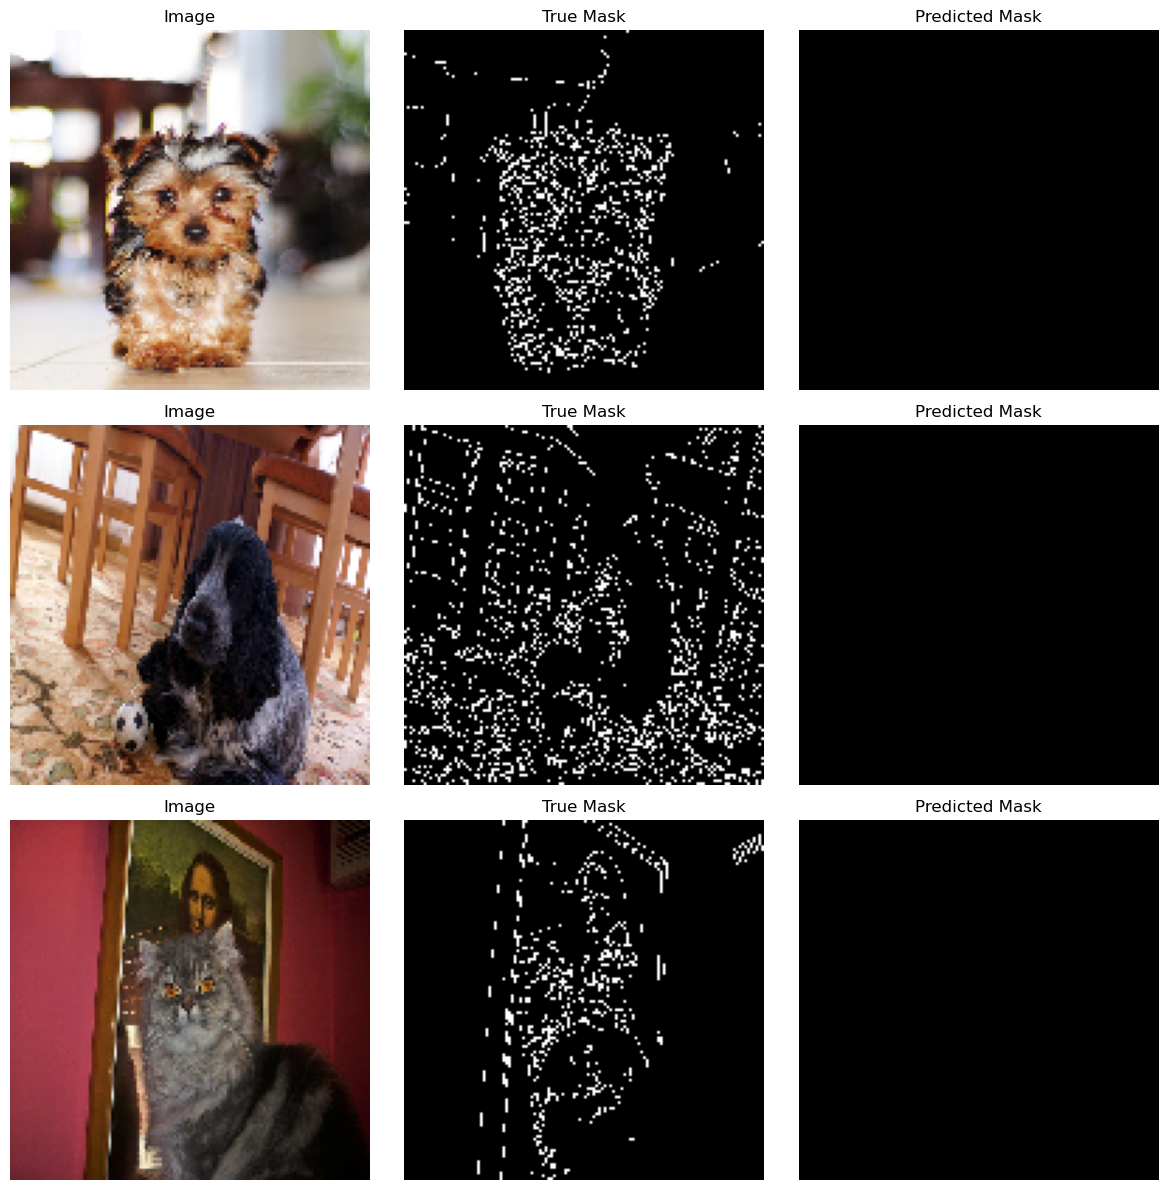

In [55]:
# Visualize sample predictions
num_samples = 3
fig, axes = plt.subplots(num_samples, 3, figsize=(12, 12))
for i in range(num_samples):
    img = X_test[i]
    true_mask = np.argmax(y_test[i], axis=-1)
    pred_mask = np.argmax(model.predict(np.expand_dims(img, axis=0))[0], axis=-1)
    
    axes[i, 0].imshow(img)
    axes[i, 0].set_title("Image")
    axes[i, 0].axis("off")
    
    axes[i, 1].imshow(true_mask, cmap="gray")
    axes[i, 1].set_title("True Mask")
    axes[i, 1].axis("off")
    
    axes[i, 2].imshow(pred_mask, cmap="gray")
    axes[i, 2].set_title("Predicted Mask")
    axes[i, 2].axis("off")

plt.tight_layout()
plt.show()

NameError: name 'history' is not defined

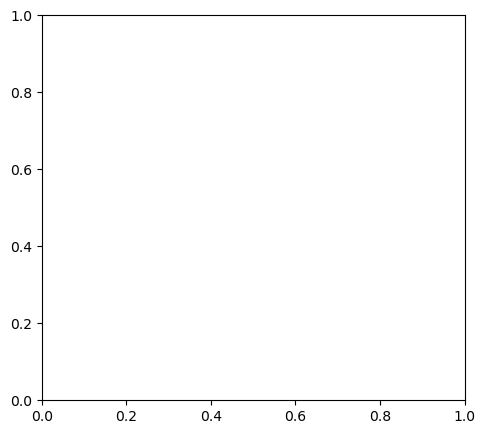

In [9]:
import seaborn as sns

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Here's a **short explanation** of what your code does:

### **1. Load & Preprocess Data**
- Reads images from `images/` and corresponding masks from `mask_images/`
- Resizes them to **128x128** and normalizes pixel values
- Converts masks into **binary class format** (background/object)
- Splits data into **training, validation, and test sets**

### **2. Build CNN Segmentation Model**
- Uses an **encoder-decoder** architecture:
  - **Encoder**: Convolution + MaxPooling (extracts features)
  - **Decoder**: Transposed Convolution + Upsampling (reconstructs mask)
  - Final layer outputs **segmentation mask** with a softmax activation

### **3. Train the Model**
- Trains using `categorical_crossentropy` loss
- Optimized with **Adam optimizer**
- Tracks **accuracy & loss** over **10 epochs**

### **4. Evaluate the Model**
- Computes **test accuracy**
- **Visualizes training history** (accuracy & loss over epochs)
- **Displays sample predictions** (image, true mask, predicted mask)
- **Calculates IoU scores** (measures overlap between true & predicted masks)
- **Plots confusion matrix** for a single sample

### **Final Goal**
This is a **semantic segmentation model** that predicts **object boundaries** in images. The visualizations help analyze **training performance, accuracy, and segmentation quality**.

Let me know if you need any modifications! 🚀